In [49]:
"""
import pandas as pd
import arcgis
import datetime
from arcgis.gis import GIS
from IPython.display import display
"""

'\nimport pandas as pd\nimport arcgis\nimport datetime\nfrom arcgis.gis import GIS\nfrom IPython.display import display\n'

In [50]:
#gis = GIS("https://www.arcgis.com", "SoldierArms", "Kittu@1999")

In [51]:
#map = gis.map("New York")

In [52]:
#map

In [53]:
#group = gis.groups.search('Thermal Activity')[0]
#group

In [54]:
#items = group.content()
#for item in items: 
#    display(item)

In [55]:
#m = gis.map("Africa", 9)
#m

In [56]:
#fires = items[0]
#m.add_layer(fires)

In [57]:
#infra = items[1]
#m.add_layer(infra)

In [58]:
#print(fires)

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot
from mpl_toolkits.basemap import Basemap

In [60]:
"""
import urllib
url='https://firms.modaps.eosdis.nasa.gov/data/active_fire/viirs/csv/VNP14IMGTDL_NRT_Global_24h.csv'
urllib.request.urlretrieve(url,'/home/soldierarms/Documents/amusatat.csv')
"""

"\nimport urllib\nurl='https://firms.modaps.eosdis.nasa.gov/data/active_fire/viirs/csv/VNP14IMGTDL_NRT_Global_24h.csv'\nurllib.request.urlretrieve(url,'/home/soldierarms/Documents/amusatat.csv')\n"

In [92]:

import datetime

%matplotlib inline
import matplotlib.pyplot as pd
from IPython.display import display

import arcgis
from arcgis.mapping import WebMap
from arcgis.gis import GIS
from arcgis.features.analyze_patterns import interpolate_points
from arcgis.geocoding import geocode
from arcgis.features.find_locations import trace_downstream
from arcgis.features.use_proximity import create_buffers

gis = GIS("https://www.arcgis.com", "SoldierArms", "Kittu@1999")


In [93]:

webmap_search = gis.content.search(query = "title: US Wildfire Activity Web Map", item_type = "Web Map", outside_org = True)

for m in webmap_search:
    print(m)
    
searched_map = WebMap(webmap_search[0])
"""
webmap_search_wind = gis.content.search(query = "title: Current Weather and Wind Station Information", item_type = "Web Map", outside_org = True)

print("Break Baby!")

#for m in webmap_search_wind:
 #   print(m)

searched_map_wind = WebMap(webmap_search_wind[0])
#searched_map_wind


for layer in searched_map.layers:
    print(layer.title)
"""

#print(searched_map.layers)
#searched_map.basemap

<Item title:"US Wildfire Activity Web Map" type:Web Map owner:cfernerDRP>
<Item title:"US Wildfire Activity Web Map-Copy" type:Web Map owner:bszukalski_drp>
<Item title:"US Wildfire Activity Web Map" type:Web Map owner:ahestilow_WittObriens>
<Item title:"US Wildfire Activity Web Map_2" type:Web Map owner:CVaillancourt_EsriMedia>
<Item title:"US Wildfire Activity Web Map" type:Web Map owner:kelly_UC>
<Item title:"US Wildfire Imagery Web Map" type:Web Map owner:jpedderDRP>
<Item title:"US Wildfire Activity Web Map Stacked" type:Web Map owner:kelly_UC>
<Item title:"US Wildfire Activity Web Map revised" type:Web Map owner:kelly_UC>
<Item title:"US Wildfire Activity" type:Web Map owner:esri_webapi>
<Item title:"Test Map - US Wildfire Activity Web Map-Template-Copy" type:Web Map owner:ebowne_nifc>


'\nwebmap_search_wind = gis.content.search(query = "title: Current Weather and Wind Station Information", item_type = "Web Map", outside_org = True)\n\nprint("Break Baby!")\n\n#for m in webmap_search_wind:\n #   print(m)\n\nsearched_map_wind = WebMap(webmap_search_wind[0])\n#searched_map_wind\n\n\nfor layer in searched_map.layers:\n    print(layer.title)\n'

In [94]:
searched_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [61]:
import pandas as pd

#digidigi=pd.read_csv('Mapdata.csv',nrows=5)

#x=digidigi[['latitude','longitude']]
#x

fh=open("amusatat.csv",'r')

try:
    for line in fh:
        he=list(line.split(","))
except:
    pass
print(he)


['33.9469', '-117.32406', '367', '0.58', '0.7', '2019-09-07', '2142', 'N', 'high', '1.0NRT', '307.9', '13.1', 'D\n']


In [62]:
import pandas as pd
cities = pd.read_csv('amusatat.csv')

# Extract the data we're interested in
lat = cities['latitude'].values
lon = cities['longitude'].values
bright = cities['bright_ti4'].values
#area = cities['area_total_km2'].values

print(lat[0])
print(lon[0])

64.29231
41.65638


In [63]:
y=str(he[0])+', '+str(he[1])
y

'33.9469, -117.32406'

/home/soldierarms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


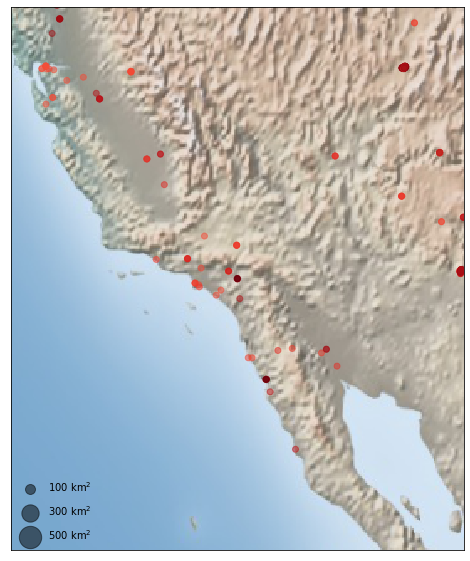

In [70]:
# 1. Draw the map background
fig = plot.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=he[0], lon_0=he[1],
            width=1E6, height=1.2E6)
m.shadedrelief()
#m.drawcoastlines(color='gray')
#m.drawcountries(color='gray')
#m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=bright,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
#plt.colorbar(label=r'$\({\rm Bright})$')
#plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plot.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plot.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

In [29]:
'''
wind_data = gis.content.get('cb1886ff0a9d4156ba4d2fadd7e8a139')
fire_data = gis.content.get('4d63f7de557c4a69bab44c376c0d3565')

web_map_wind = WebMap()

web_map_wind.add_layer(fire_data, options={'title':'USA Wildfire Activity'})
web_map_wind.add_layer(wind_data, options={'title':'Current Weather and Wind Station Data - Stations'})
'''
#print(searched_map.layers)
#print(searched_map.FieldName)
#for f in searched_map.properties.fields:
#    print(f['name'])


"\nwind_data = gis.content.get('cb1886ff0a9d4156ba4d2fadd7e8a139')\nfire_data = gis.content.get('4d63f7de557c4a69bab44c376c0d3565')\n\nweb_map_wind = WebMap()\n\nweb_map_wind.add_layer(fire_data, options={'title':'USA Wildfire Activity'})\nweb_map_wind.add_layer(wind_data, options={'title':'Current Weather and Wind Station Data - Stations'})\n"

In [30]:
#searched_map

In [31]:
"""
webmap_wind = gis.content.search(query = "title: Current Weather and Wind Station Information", item_type = "Web Map", outside_org = True)

for m in webmap_wind:
    print(m)

webmap_empty = WebMap()

searched_wind = WebMap(webmap_wind[0])

#searched_wind.add_layer(webmap_wind, options={'title':'Current Weather and Wind Station Information'})
"""

'\nwebmap_wind = gis.content.search(query = "title: Current Weather and Wind Station Information", item_type = "Web Map", outside_org = True)\n\nfor m in webmap_wind:\n    print(m)\n\nwebmap_empty = WebMap()\n\nsearched_wind = WebMap(webmap_wind[0])\n\n#searched_wind.add_layer(webmap_wind, options={\'title\':\'Current Weather and Wind Station Information\'})\n'

In [32]:
#searched_map_wind

In [33]:
from geopy.geocoders import Nominatim

In [34]:
geolocator = Nominatim(user_agent='geopy/1.20.0')

/home/soldierarms/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [35]:

location = geolocator.reverse(y)
print(location.raw)

{'place_id': 205423270, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 142985097, 'lat': '33.947089', 'lon': '-117.324467', 'display_name': '540, Via Zapata, Riverside, Riverside County, California, 92507, USA', 'address': {'house_number': '540', 'road': 'Via Zapata', 'city': 'Riverside', 'county': 'Riverside County', 'state': 'California', 'postcode': '92507', 'country': 'USA', 'country_code': 'us'}, 'boundingbox': ['33.946989', '33.947189', '-117.324567', '-117.324367']}


In [36]:
city = str(location.raw['address']['city'])
city

'Riverside'

In [37]:
import urllib

fh=open("citycodes.txt","r")
for line in fh:
    if city in line:
        x=list(line.split(' '))
        break
fh.close()

code=x[1]
#print(x[0])
contactlist=list() 
query = "contact of fire departments near " + str(x[0])
try: 
     from googlesearch import search
except ImportError:  
    print("No module named 'google' found")

try:
    for url in search(query, stop=10):
        print(url)
        if "justdial" not in url:
            webUrl  = urllib.request.urlopen(url)
            print ("result code: " + str(webUrl.getcode()))
            data = webUrl.read()
            #print (data)
            fh=open("contact.txt","a")
            fh.write(str(data))
            fh=open("contact.txt","r")
            for line in fh:
                i=0
                if str(code) in line:
                    result = line.find(str(code),i,len(line))
                    while(result!=-1):
                        i=result
                        x=line[result:result+13]
                        if x not in contactlist:
                            contactlist.append(x)
                            #print(line[result:result+12])
                        result = line.find(str(code),i+1,len(line))
            fh.close()
except:
    pass
print(contactlist)


https://www.riversideca.gov/fire/
result code: 200
http://www.rvcfire.org/
result code: 200
http://www.rvcfire.org/Pages/ContactUs.aspx
result code: 200
https://www.facebook.com/CityOfRiversideFire/
result code: 200
https://en.wikipedia.org/wiki/Riverside_Fire_Department
result code: 200
https://riversidefirefighters.com/
['(951) 826-531', '(951) 354-200', '(951) 940-690', '(951) 955-200', '(951) 358-505', '(951) 486-320', '(951) 943-497', '(951) 940-850', '(951) 940-698', '(951) 943-064', '(951) 955-477']


In [96]:
from tkinter import *  
from PIL import ImageTk,Image  
root = Tk()  
canvas = Canvas(root, width = 500, height = 500) 
tk.canvas?

#canvas.pack()  
#img = ImageTk.PhotoImage(Image.open(m))  
#canvas.create_image(20, 20, anchor=NW, image=img) 

T = tk.Text(root, height=50, width=50,font=20)
T.pack()
T.insert(tk.END,"Fire Department: " + city + '\n\n')
for num in contactlist:
    T.insert(tk.END, num+'\n')
tk.mainloop()


root.mainloop()

Object `tk.canvas` not found.
